# Identifier Search

This notebook uses the internet archive python package to find relevant identifiers for books that we want to make a word cloud with.

In [66]:
# internet archive commandline tool
import internetarchive as ia

# python spreadsheet manager
import pandas as pd

# numerical stuff (array slicing and dicing)
import numpy as np

# Utilities
import requests
import xml.etree.ElementTree as ET
from os import path

# Image and wordcloud stuff
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Put together your search from the `ia.search` module

In [55]:
# We're looking for all books in project gutenberg with MARC pages
s = ia.session.ArchiveSession()

# input your search terms in the text string below
search_arguments = 'collection:gutenberg mediatype:texts format:MARC'

# Send the search to the archive!
search = ia.search.Search(s, search_arguments)

In [74]:
# Append all the identifiers to a list
id_list = []

for r in search:
    id_list.append(r.get('identifier'))

In [77]:
print(id_list)

['6sath10', 'ltwrr10', 'moby10b', 'mrt2w10']


... there are not a lot of books in project gutenberg with MARC pages...

## Make a word cloud from the texts of all 4 books

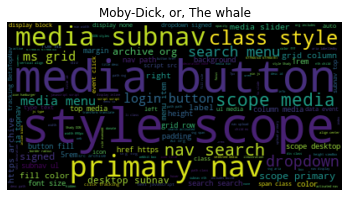

In [67]:
# Form URLs
base_url = 'https://archive.org/download/{itemid}/{itemid}_'
full_txt_url = base_url.format(itemid=id_list[2]) + "djvu.txt"
meta_txt_url = base_url.format(itemid=id_list[2]) + "meta.xml"

# Request metadata and full text
r_meta = requests.get(meta_txt_url)
r_text = requests.get(full_txt_url)

# Parse metadata
tree_meta = ET.fromstring(r_meta.content)

# Plot wordcloud
wc = WordCloud().generate(r_text.text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title(tree_meta.find('title').text)
plt.show()

Eek!!  Looks like the text files on these books is different than on the other page!